In [98]:
from keras.models import load_model
from PIL import Image
import numpy as np
import json
import os

In [99]:
model_dir = '/home/ubuntu/repositories/sudoku-ml-vision-app/temporary/ml_models/2022_12_30__19_54_01'

model = load_model(os.path.join(model_dir,'model'))

with open(os.path.join(model_dir,'index_label_map.json'),'r') as label_map_file:
    index_label_map = json.load(label_map_file)

In [180]:
n_sample = 10

images = []
labels = []
total_width = 0

for digit in range(1,10):
    for n in range(1,n_sample+1):
        image_path = f'/home/ubuntu/repositories/sudoku-ml-vision-app/temporary/10000/{digit}/{digit}_{n}.jpg'
        image = Image.open(image_path)
        total_width += image.width
        
        images.append(image)
        labels.append(str(digit))
    
print(labels)

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9']


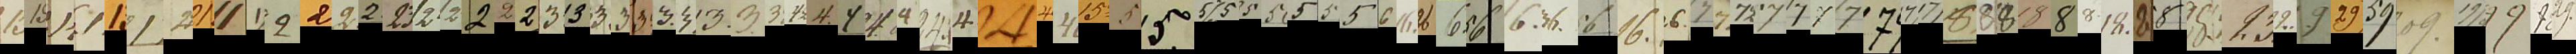

In [181]:
images_combined = Image.new('RGB',(total_width,80))
image_rb = 0
for image in images:
    images_combined.paste(image,(image_rb,0))
    image_rb += image.width
    
images_combined

In [182]:
image.width, image.height

(36, 59)

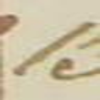

In [183]:
resized_images = [image.resize(size=(100,100)) for image in images]
resized_images[0]

In [184]:
resized_images[0].width, resized_images[0].height

(100, 100)

In [185]:
image_array = [np.asarray(resized_image) for resized_image in resized_images]
image_array = np.array(image_array)
image_array.shape

(90, 100, 100, 3)

In [197]:
predictions = model.predict(image_array)
predictions

3/3 [==============================] - 0s 39ms/step


array([[3.42450797e-08, 1.36857182e-01, 1.20859034e-01, 6.05556276e-03,
        6.77767336e-01, 2.72959098e-03, 3.11330613e-02, 8.82815511e-04,
        2.21366640e-02, 1.57872762e-03],
       [3.71589959e-09, 9.68833447e-01, 1.36258767e-03, 4.12165100e-05,
        2.81837732e-02, 1.30806975e-05, 8.31659592e-04, 9.99396798e-05,
        2.14919855e-04, 4.19330667e-04],
       [3.50025275e-16, 9.68912959e-01, 1.08611863e-03, 9.79246835e-08,
        1.94652267e-02, 3.27735052e-07, 1.65898868e-07, 3.28558745e-05,
        3.64582661e-06, 1.04985703e-02],
       [5.82918525e-04, 6.58116862e-02, 9.34040025e-02, 7.38654227e-04,
        5.03119789e-02, 2.14395070e-04, 1.02510521e-05, 1.78361163e-01,
        2.71810628e-02, 5.83384037e-01],
       [7.24552106e-03, 7.55084381e-02, 1.37081340e-01, 1.34126514e-01,
        1.82214633e-01, 1.30280092e-01, 4.35869470e-02, 6.19799159e-02,
        1.30114660e-01, 9.78619456e-02],
       [1.30053357e-12, 9.47248399e-01, 2.25267652e-02, 2.44023438e-04,
   

In [198]:
predictions.tolist()

[[3.424507966087731e-08,
  0.13685718178749084,
  0.12085903435945511,
  0.006055562756955624,
  0.6777673363685608,
  0.002729590982198715,
  0.03113306127488613,
  0.000882815511431545,
  0.022136664018034935,
  0.0015787276206538081],
 [3.7158995880304246e-09,
  0.9688334465026855,
  0.0013625876745209098,
  4.121650999877602e-05,
  0.028183773159980774,
  1.3080697499390226e-05,
  0.0008316595922224224,
  9.993967978516594e-05,
  0.00021491985535249114,
  0.0004193306667730212],
 [3.500252746151865e-16,
  0.9689129590988159,
  0.0010861186310648918,
  9.792468347313843e-08,
  0.01946522668004036,
  3.2773505154182203e-07,
  1.6589886797646614e-07,
  3.285587445134297e-05,
  3.645826609499636e-06,
  0.010498570278286934],
 [0.0005829185247421265,
  0.06581168621778488,
  0.09340400248765945,
  0.0007386542274616659,
  0.05031197890639305,
  0.00021439506963361055,
  1.0251052117382642e-05,
  0.17836116254329681,
  0.02718106284737587,
  0.5833840370178223],
 [0.0072455210611224174,


In [199]:
max_indices = predictions.argmax(axis=1).tolist()
prediction_payload = [index_label_map[str(max_index)] for max_index in max_indices]
print(prediction_payload)

['4', '1', '1', '9', '4', '1', '2', '1', '1', '1', '1', '1', '2', '2', '1', '2', '2', '2', '2', '2', '3', '9', '9', '3', '9', '3', '8', '7', '3', '3', '4', '1', '4', '1', '4', '4', '4', '1', '4', '4', '4', '1', '5', '6', '5', '5', '5', '5', '5', '5', '6', '4', '9', '1', '6', '4', '8', '8', '2', '5', '1', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '3', '3', '9', '8', '7', '4', '3', '6', '2', '1', '4', '9', '4', '9', '7', '2', '7', '4', '9']


In [200]:
print(labels)

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9']


In [201]:
np.mean([prediction_payload[i] == labels[i] for i in range(len(labels))])

0.5222222222222223